# AR(p)
# Autoregressive Model
In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors. In our example we forecasted numbers of airline passengers in thousands based on a set of level, trend and seasonal predictors.

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html'>ar_model.AR</a></strong><font color=black>(endog[, dates, freq, missing])</font>&nbsp;&nbsp;Autoregressive AR(p) model<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.ARResults.html'>ar_model.ARResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Class to hold results from fitting an AR model</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/AR.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive models</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Autoregressive_model'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive model</font></div>

## Perform standard imports and load datasets
For this exercise we'll look at monthly U.S. population estimates in thousands from January 2011 to December 2018 (96 records, 8 years of data). Population includes resident population plus armed forces overseas. The monthly estimate is the average of estimates for the first of the month and the first of the following month.
Source: https://fred.stlouisfed.org/series/POPTHM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the U.S. Population dataset
df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [3]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


## Plot the source data

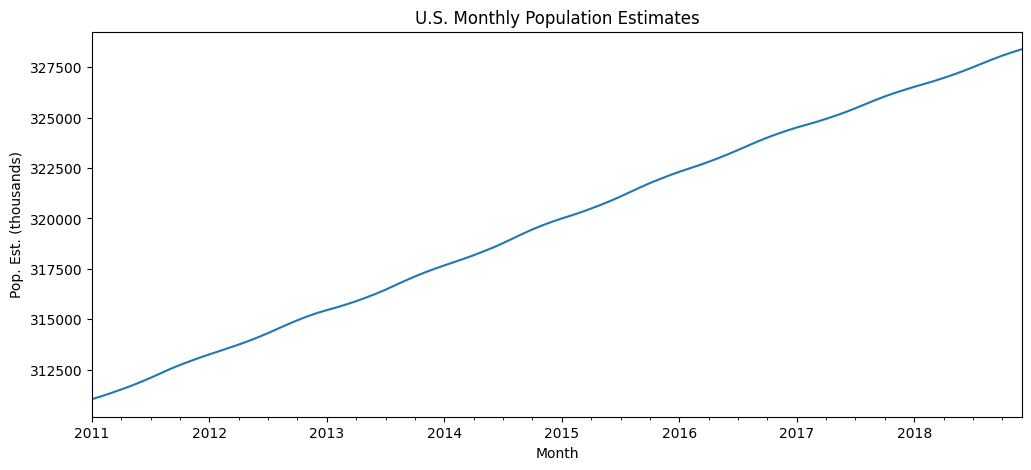

In [6]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
xlabel='Month'

ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Split the data into train/test sets

In [7]:
len(df)

96

In [8]:
# Set one year for testing
train = df.iloc[:84]
test = df.iloc[84:]

## Fit an AR(1) Model

In [12]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Load specific forecasting tools
from statsmodels.tsa.ar_model import AutoReg

In [18]:
model = AutoReg(train['PopEst'], lags = 1)
AR1fit = model.fit()
print(f'Coefficients:\n{AR1fit.params}')

Coefficients:
const        284.913797
PopEst.L1      0.999686
dtype: float64


<div class="alert alert-info"><strong>NOTE: </strong>There's a slight difference between the object returned by the Holt-Winters Exponential Smoothing <tt>.fit()</tt> method and that returned by AR. The Holt-Winters object uses <tt>.forecast()</tt> for predicted values, while AR uses <tt>.predict()</tt>.</div>

In [26]:
# This is the general format for obtaining predictions
start = len(train)
end = len(train) + len(test) - 1
predictions1 = AR1fit.predict(start = start, end = end, dynamic = False).rename('AR(1) Predictions')

In [20]:
predictions1

,AR(1) Predictions
2018-01-01,326560.403377
2018-02-01,326742.749463
2018-03-01,326925.038278
2018-04-01,327107.269838
2018-05-01,327289.444162
2018-06-01,327471.561268
2018-07-01,327653.621173
2018-08-01,327835.623896
2018-09-01,328017.569455
2018-10-01,328199.457868


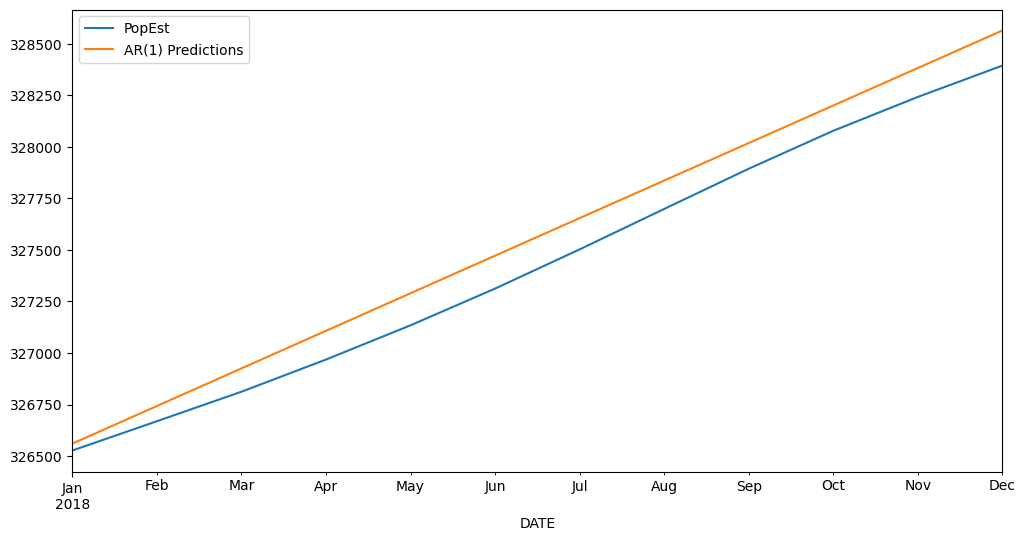

In [22]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

## Fit an AR(2) Model

In [27]:
# Recall that our model was already created above based on the training set
model = AutoReg(train['PopEst'], lags = 2)
AR2fit = model.fit()
print(f'Coefficients:\n{AR2fit.params}')

Coefficients:
const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64


In [28]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

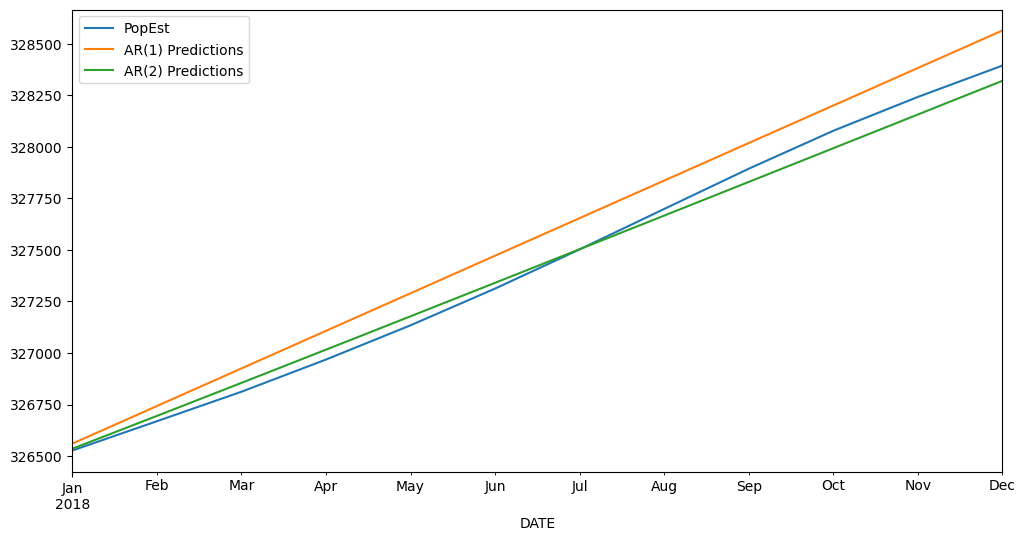

In [29]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

## Fit an AR(p) model where statsmodels chooses p
This time we'll omit the <tt>maxlag</tt> argument in <tt>AR.fit()</tt> and let statsmodels choose a p-value for us.

In [31]:
model = AutoReg(train['PopEst'], lags = 11)
AR11fit = model.fit()
print(f'Coefficients:\n{AR11fit.params}')

Coefficients:
const         96.143523
PopEst.L1      2.298626
PopEst.L2     -2.027441
PopEst.L3      1.356878
PopEst.L4     -1.171630
PopEst.L5      0.816723
PopEst.L6     -0.699990
PopEst.L7      0.727004
PopEst.L8     -0.354790
PopEst.L9      0.241036
PopEst.L10    -0.179865
PopEst.L11    -0.006819
dtype: float64


In [32]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(11) Predictions'

predictions11 = AR11fit.predict(start=start,end=end,dynamic=False).rename(rename)

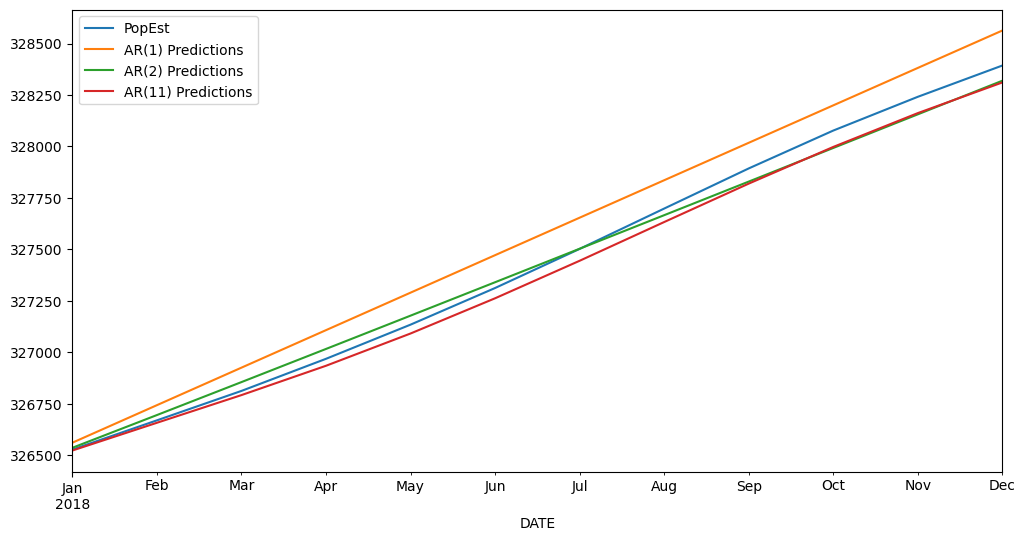

In [33]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions11.plot(legend=True,figsize=(12,6));

## Evaluate the Model
It helps to have a means of comparison between two or more models. One common method is to compute the Mean Squared Error (MSE), available from scikit-learn.

In [44]:
from sklearn.metrics import mean_absolute_percentage_error

labels = ['AR(1)','AR(2)','AR(11)']
preds = [predictions1, predictions2, predictions11]  # these are variables, not strings!

for i in range(3):
    error = mean_absolute_percentage_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error}')

AR(1) Error: 0.00038699252384249305
AR(2) Error: 0.00013668556759700932
AR(11) Error: 0.0001528768228585955


We see right away how well ARs performed


In [40]:
modls = [AR1fit,AR2fit,AR11fit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic}')

AR(1) AIC: 767.6378091856507
AR(2) AIC: 649.209484877313
AR(11) AIC: 467.1195582029836


## Forecasting
Now we're ready to train our best model on the greatest amount of data, and fit it to future dates.

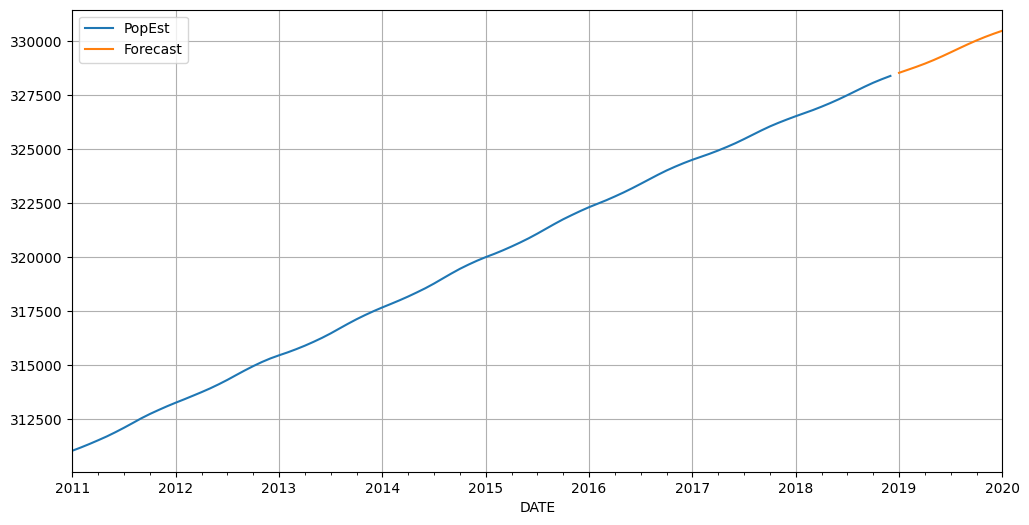

In [47]:
# First, retrain the model on the full dataset
model = AutoReg(df['PopEst'], lags = 11)

# Next, fit the model
ARfit = model.fit()

# Make predictions
fcast = ARfit.predict(start=len(df), end = len(df) + 12).rename('Forecast')

# Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6), grid = True);

## Great job!